In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)

plt.style.use("seaborn-v0_8")


In [3]:
df = pd.read_csv("Cleaned_Loan_Train_Data.csv")
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.070489,0.000000,0.198860,0.74359,1,1,0,1
1,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1,0,0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1,1,0,1
3,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1,1,0,1
4,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1,1,0,1


In [ ]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
param_grid = {
    "criterion": ["entropy"],
    "max_depth": [3, 4, 5, 6, 7, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6, 10],
    "class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Accuracy: 0.8220309810671257


In [ ]:
best_tree = grid.best_estimator_
best_tree.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
best_tree = grid.best_estimator_
best_tree.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 0.8269230769230769

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.50      0.64        32
           1       0.81      0.97      0.89        72

    accuracy                           0.83       104
   macro avg       0.85      0.74      0.76       104
weighted avg       0.84      0.83      0.81       104



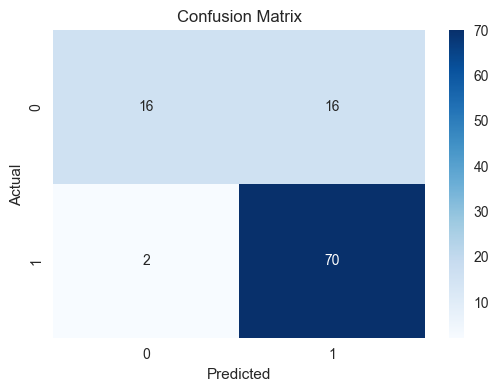

In [ ]:
y_pred = best_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


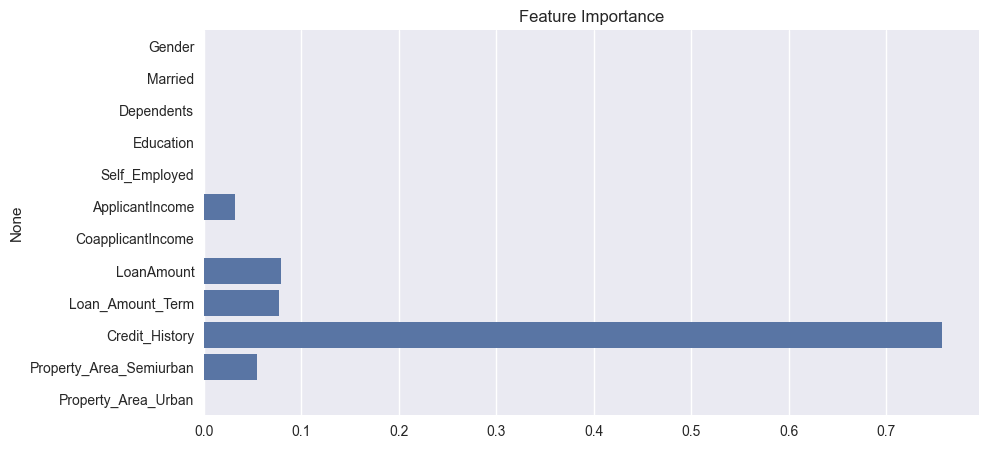

In [ ]:
importances = best_tree.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


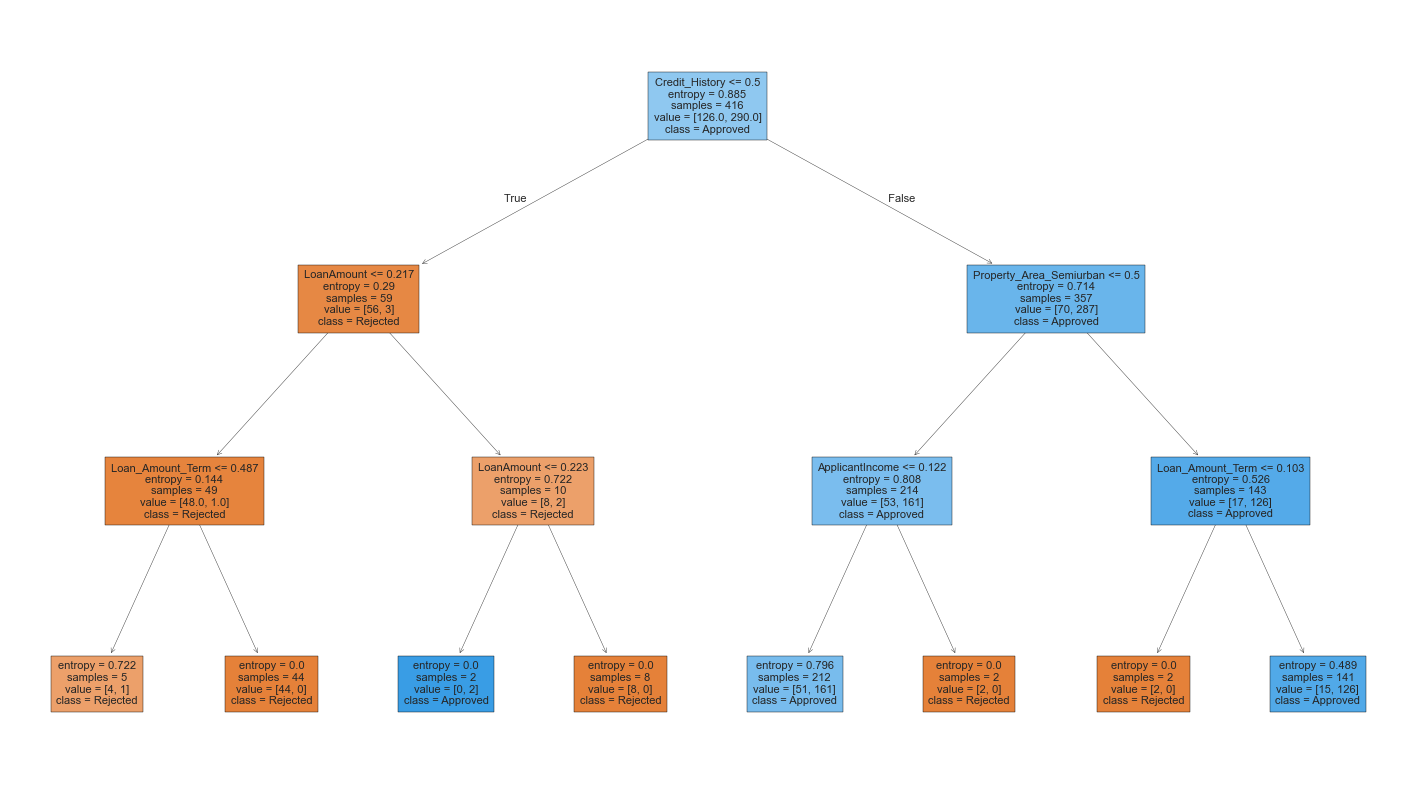

In [ ]:
plt.figure(figsize=(18,10))
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=["Rejected", "Approved"],
    filled=True,
    fontsize=8
)
plt.show()


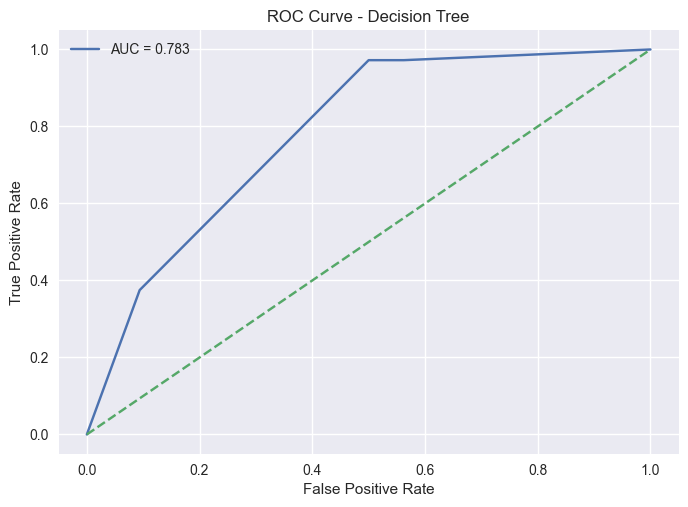

In [ ]:
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()
